In [5]:
# import numpy and pands
import numpy as np
import pandas as pd

# import matplotlib and plotly
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

# import tensorflow
import tensorflow as tf

In [6]:
class get_data():

    def __init__(self,):

        # read data
        self.df_BTC = pd.read_csv("https://www.cryptodatadownload.com/cdd/Bitfinex_BTCUSD_d.csv", delimiter=",", skiprows=[0])
        self.df_BTC['date'] = (pd.to_datetime(self.df_BTC['date']))
        
        self.df_LTC = pd.read_csv("https://www.cryptodatadownload.com/cdd/Bitfinex_LTCUSD_d.csv", delimiter=",", skiprows=[0])
        self.df_LTC['date'] = (pd.to_datetime(self.df_BTC['date']))
        
        self.df_SOL = pd.read_csv("https://www.cryptodatadownload.com/cdd/Bitfinex_SOLUSD_d.csv", delimiter=",", skiprows=[0])
        self.df_SOL['date'] = (pd.to_datetime(self.df_BTC['date']))
        
        self.df_XMR = pd.read_csv("https://www.cryptodatadownload.com/cdd/Bitfinex_XMRUSD_d.csv", delimiter=",", skiprows=[0])
        self.df_XMR['date'] = (pd.to_datetime(self.df_BTC['date']))

        # first derivative
        self.df_BTC_diff = pd.DataFrame(columns=['diff_to_yesterday', 'date'])
        self.df_BTC_diff['diff_to_yesterday'], self.df_BTC_diff['date'] = -self.df_BTC['open'].diff(), self.df_BTC['date']
        
        self.df_LTC_diff = pd.DataFrame(columns=['diff_to_yesterday', 'date'])
        self.df_LTC_diff['diff_to_yesterday'], self.df_LTC_diff['date'] = -self.df_LTC['open'].diff(), self.df_LTC['date']
        
        self.df_SOL_diff = pd.DataFrame(columns=['diff_to_yesterday', 'date'])
        self.df_SOL_diff['diff_to_yesterday'], self.df_SOL_diff['date'] = -self.df_SOL['open'].diff(), self.df_SOL['date']
        
        self.df_XMR_diff = pd.DataFrame(columns=['diff_to_yesterday', 'date'])
        self.df_XMR_diff['diff_to_yesterday'], self.df_XMR_diff['date'] = -self.df_XMR['open'].diff(), self.df_XMR['date']
        
    def truncate(self, pos):
        # truncate data
        self.df_BTC = self.df_BTC.iloc[:pos]
        self.df_LTC = self.df_LTC.iloc[:pos]
        self.df_SOL = self.df_SOL.iloc[:pos]
        self.df_XMR = self.df_XMR.iloc[:pos]
        
        # truncate derivatives
        self.df_BTC_diff = self.df_BTC_diff.iloc[:pos]
        self.df_LTC_diff = self.df_LTC_diff.iloc[:pos]
        self.df_SOL_diff = self.df_SOL_diff.iloc[:pos]
        self.df_XMR_diff = self.df_XMR_diff.iloc[:pos]

    def plot_data(self, BTC=True, LTC=True, SOL=True, XMR=True):
        
        arguments = locals()
        subplot_titles = []
        
        rows = 0
        for k in arguments.keys():
            if arguments[k] == True:
                rows += 1
                subplot_titles.append(k)
                
        print(subplot_titles)
        
            
        #print(rows)
        
        #self.fig = make_subplots(cols=1, rows=rows, shared_xaxes=True, subplot_titles=["BTC", "LTC", "SOL", "XMR"])
        self.fig = make_subplots(cols=1, rows=rows, shared_xaxes=True, subplot_titles=subplot_titles)

        row = 1
        if BTC:
            self.fig.add_trace(go.Scatter(y=self.df_BTC['open'], x=self.df_BTC['date'], mode='lines',  ), col=1, row=row,)
            row += 1
        if LTC:
            self.fig.add_trace(go.Scatter(y=self.df_LTC['open'], x=self.df_LTC['date'], mode='lines',  ), col=1, row=row,)
            row += 1
        if SOL:
            self.fig.add_trace(go.Scatter(y=self.df_SOL['open'], x=self.df_SOL['date'], mode='lines',  ), col=1, row=row,)
            row += 1
        if XMR:
            self.fig.add_trace(go.Scatter(y=self.df_XMR['open'], x=self.df_XMR['date'], mode='lines',  ), col=1, row=row,)
            row += 1

        self.fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True, showgrid=True, gridwidth=1, gridcolor='blue', title_text="EUR")
        self.fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True, showgrid=True, gridwidth=1, gridcolor='blue')

        layout = go.Layout(title_text="Exchange rates",
                        # width=1000, height=500,
                        height=int(200 * rows), width=1000, 
                        autosize = True, showlegend=False, 
                        #margin={"b":30, "l":30, "r":30, "t":50}, 
                        )

        self.fig.update_layout(layout)
        self.fig.update_yaxes(automargin=True)
        
        # self.fig.add_vrect(x0=df['Date'].iloc[int(df.shape[0]*0.2)], x1=df['Date'].iloc[0], fillcolor="gray", opacity=0.25, layer="below", line_width=0)

        self.fig.update_xaxes(col=1, row=3, title_text="Date")
        self.fig.show()

    def plot_derivatives(self,):
        
        self.fig = make_subplots(cols=1, rows=4,  shared_xaxes=True, subplot_titles=["BTC", "LTC", "SOL", "XMR"],)

        self.fig.add_trace(go.Scatter(y=self.df_BTC_diff['open'], x=self.df_BTC_diff['date'], mode='lines',  ), col=1, row=1,)
        self.fig.add_trace(go.Scatter(y=self.df_LTC_diff['open'], x=self.df_LTC_diff['date'], mode='lines',  ), col=1, row=2,)
        self.fig.add_trace(go.Scatter(y=self.df_SOL_diff['open'], x=self.df_SOL_diff['date'], mode='lines',  ), col=1, row=3,)
        self.fig.add_trace(go.Scatter(y=self.df_XMR_diff['open'], x=self.df_XMR_diff['date'], mode='lines',  ), col=1, row=4,)

        self.fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True, showgrid=True, gridwidth=1, gridcolor='blue', title_text="EUR")
        self.fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True, showgrid=True, gridwidth=1, gridcolor='blue')

        layout = go.Layout(title_text="First Derivatives",
                        autosize = True, showlegend=False, 
                        height=800, width=800, 
                        #margin={"b":30, "l":30, "r":30, "t":50}, 
                        )

        self.fig.update_layout(layout)
        self.fig.update_yaxes(automargin=True)

        self.fig.update_xaxes(col=1, row=3, ) #title_text="Date")
        self.fig.show()
        
    def generate_dataset():
        self.x = self.df_BTC['open'].to_numpy()
        self.y = self.df_BTC['open'].to_numpy()

        self.train = 15
        self.test = 14
        self.validation = 13

data = get_data()

In [7]:
pos = np.where(data.df_BTC['date'] == '01-01-2017')[0][0] + 1
data.truncate(pos)
data.plot_data(BTC=True, LTC=True, SOL=True, XMR=True)
#data.plot_derivatives()

['BTC', 'LTC', 'SOL', 'XMR']


## Scaling and fourier transform

Below we scale the data with the sklearns MinMaxScaler and perform a fourier transform to identify the seasonal periods.

Interestingly, there is a huge peak at the 0-frequency, indicating that there is a strong DC-component (a significant steady-state) in the data, which is probably due to the strong general upward trend of the exchange rate. Often enough, this component is related to the average value and disappears if the mean of the series is subtracted. But not in the bitcoin data. Maybe it is due to the fact that the time series is not stationary?

Even more interesting is the peak at the bi-montly frequency. Later on we will use this time window in our prediction model. However, it is not clear why this peak is so prominent. We will find out later on is this is of any use to the prediction.

2024-04-29 14:36:16.692611: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-29 14:36:16.854987: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-29 14:36:16.855274: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

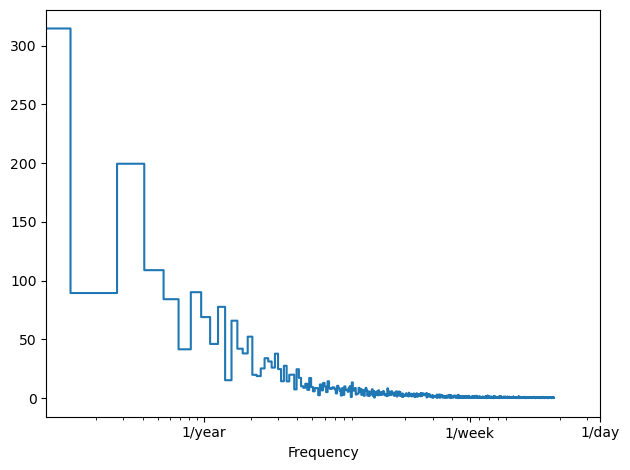

In [8]:
# Perform Fourier transform to identify seasonal periods
from tensorflow.signal import rfft # fast fourier transform
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

dfTest = data.df_BTC[['date', 'open']].copy() 

#print(dfTest.head())
dfTest['scaled'] = min_max_scaler.fit_transform(dfTest[['open']])
#print(dfTest.head())

fft = rfft(dfTest['scaled'] - dfTest['scaled'].mean())

f_per_dataset = np.arange(0, len(fft))

n_sample_h = len(dfTest['scaled'])
days_per_week = 7
days_per_year = 365
weeks_per_dataset = n_sample_h / days_per_week
years_per_dataset = n_sample_h / days_per_year

f_per_year = f_per_dataset / years_per_dataset

plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.xticks([1, 52, 365], ['1/year', '1/week', '1/day'])
#plt.ylim(0, 300000)
plt.xlabel('Frequency')
plt.tight_layout()
plt.savefig('2 - fft.png')

plt.show()

#print (len(fft))
#print (data.df_BTC.shape)

## Classification

#### Randomwalk / Stationarity

Now let's determine, whether the bitcoin data is a random walk. We will use the Augmented Dickey-Fuller test to find out.

What is a random walk?
A random walk is a time series, whose first derivative is _stationary_ (meaning that its statistical properties like mean or variance won't change over time) and uncorrelated.

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

adfuller_result = adfuller(data.df_BTC['open'])

print (f'p-value (should be < 0.05 in order to be a stationary process): {adfuller_result[1]}')

p-value (should be < 0.05 in order to be a stationary process): 0.05088207456341736


In [12]:
# differentiate the btc-data
df_BTC_diff = np.diff(data.df_BTC['open'], n=1)

In [13]:
adfuller_result = adfuller(df_BTC_diff)

print (f'p-value (should be < 0.05 in order to be a stationary process): {adfuller_result[1]}')

p-value (should be < 0.05 in order to be a stationary process): 5.203295302071481e-13


#### Result

According to the Augmented Dickey-Fuller test, the bitcoin data _is_ a random walk because its first derivative is a stationary process. How do we know this? Because the p-value of the differenced time series is far below 0.05.

## Autocorrelation

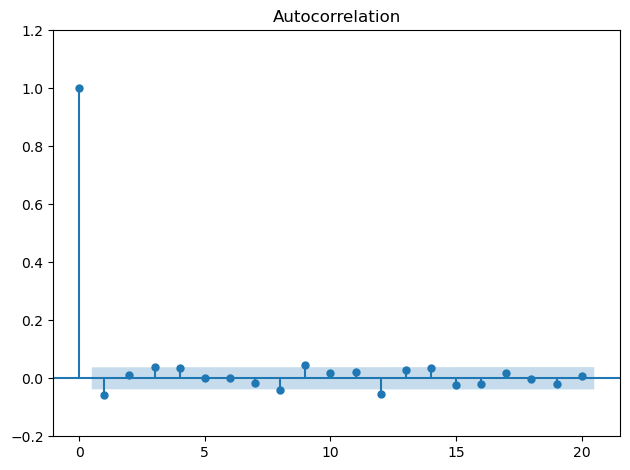

In [17]:
plot_acf(df_BTC_diff, lags=20)

plt.ylim(-0.2, 1.2)
plt.tight_layout()